# Задача 18
Для набора данных проведите масштабирование данных для одного (произвольного) числового признака на основе Z-оценки.

In [1]:
#Загрузка и предобработка данных
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [2]:
housing = fetch_california_housing()
data = pd.DataFrame(housing.data,
                      columns=housing.feature_names)
data['Y'] = housing.target
data.shape

(20640, 9)

In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Нужно ли масштабирование
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop('Y', axis=1)
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Y'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((16512, 8), (4128, 8))

In [6]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


In [7]:
data_cs11_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


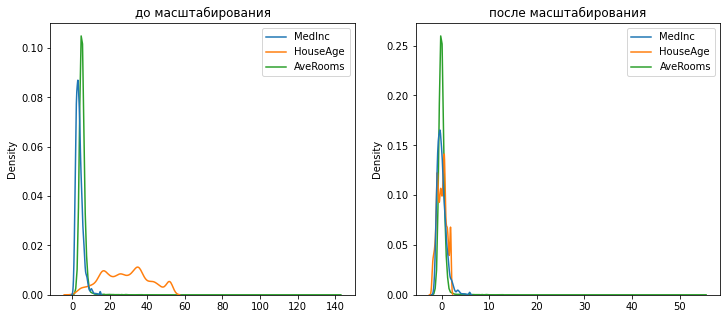

In [8]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

draw_kde(['MedInc', 'HouseAge', 'AveRooms'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')


In [9]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)
data_cs12_scaled_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-1.663183e-16,5.239134e-17,1.912768e-16,2.119321e-16,2.280691e-17,1.183377e-18,3.050962e-16,-1.818528e-15
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-1.784934e+00,-2.193326e+00,-1.758064e+00,-1.510898e+00,-1.265666e+00,-2.022041e-01,-1.446964e+00,-2.354008e+00
25%,-6.894428e-01,-8.425832e-01,-3.830692e-01,-1.840409e-01,-5.688744e-01,-5.757397e-02,-7.965259e-01,-1.113670e+00
50%,-1.753078e-01,3.142707e-02,-8.210226e-02,-1.001681e-01,-2.324925e-01,-2.427528e-02,-6.421054e-01,5.401142e-01
75%,4.619818e-01,6.670709e-01,2.359401e-01,-4.655013e-05,2.649611e-01,1.542318e-02,9.722905e-01,7.792156e-01
max,5.880939e+00,1.858903e+00,5.221361e+01,6.500353e+01,3.048505e+01,1.069443e+02,2.956360e+00,2.622289e+00


In [10]:
data_cs12_scaled_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-0.014481,0.013911,-0.023175,-0.028812,0.000977,-0.010484,-0.000777,0.011417
std,1.021662,0.999880,0.692871,0.604269,1.038310,0.100045,0.997493,0.989980
min,-1.784934,-2.113871,-1.521001,-1.428741,-1.258546,-0.207179,-1.437605,-2.378915
25%,-0.712242,-0.842583,-0.381876,-0.186036,-0.564647,-0.056193,-0.791846,-1.058876
50%,-0.198860,0.031427,-0.076683,-0.101062,-0.220479,-0.021970,-0.642105,0.530152
75%,0.451514,0.667071,0.224293,-0.000800,0.271190,0.019040,0.976970,0.784197
max,5.880939,1.858903,17.369108,18.082473,24.152526,4.165286,2.914245,2.502738


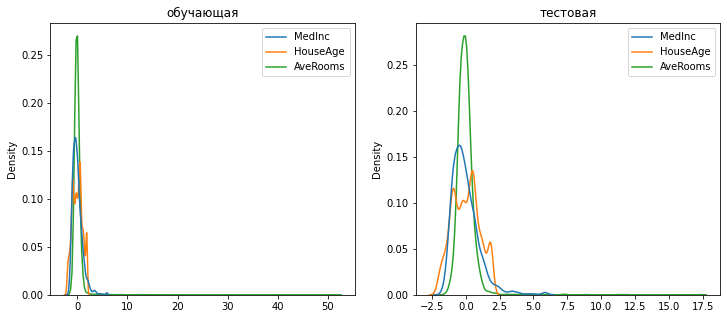

In [11]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['MedInc', 'HouseAge', 'AveRooms'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')


# Задача №38.
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте класс SelectPercentile для 10% лучших признаков, и метод, основанный на взаимной информации.

Text(0, 0.5, 'Взаимная информация')

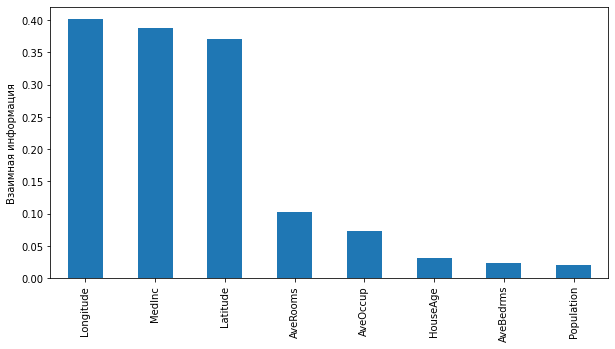

In [20]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
housing_X = housing.data
housing_y = housing.target
housing_feature_names = housing['feature_names']
mi = mutual_info_regression(housing_X, housing_y)
mi = pd.Series(mi)
mi.index = housing_feature_names
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [21]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(housing_X, housing_y)

list(zip(housing_feature_names, sel_mi.get_support()))

[('MedInc', True),
 ('HouseAge', False),
 ('AveRooms', True),
 ('AveBedrms', False),
 ('Population', False),
 ('AveOccup', True),
 ('Latitude', True),
 ('Longitude', True)]

# Дополнительное

<ipython-input-25-578afb7a46a4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Longitude'])


<Axes: xlabel='Longitude', ylabel='Density'>

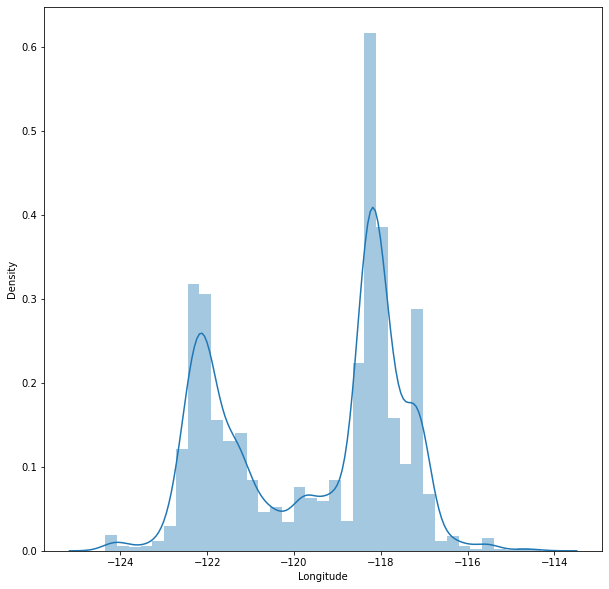

In [25]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Longitude'])